<a href="https://colab.research.google.com/github/Madelineandrea/BreastCancerPrediction_RF/blob/main/Breast_Cancer_Prediction_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK 6 - DATA ANALYTICS LF01**
- ABYGAEL ADRIANTY PUTRI - 2602242271
- AXELL PRITA AURELIE ATMOJO - 2602143201
- MADELINE ANDREA SOFIAN - 2602169371
- NI PUTU AYU SEKAR PRADNYA DEWI - 2602161160

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.exceptions import NotFittedError

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load data

In [ ]:
file_path = 'breast-cancer-wisconsin.data'
# Mendefinisikan nama kolom berdasarkan dataset dari sumber
column_names = ['ID', 'Clump_thickness', 'Uniformity_of_cell_size',
                'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei',
                'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'
]
data= pd.read_csv(file_path, names= column_names, delimiter=',', header= None)
data.head()


,ID,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Preprocessing


In [ ]:
# Drop kolom 'ID' karena tidak diperlukan untuk prediksi
data =data.drop(columns='ID')

In [ ]:
# Mengganti missing value dengan 'NaN'
data = data.replace('?', np.nan)

In [ ]:
# Mengubah semua data menjadi numerik
data= data.apply(pd.to_numeric)

In [ ]:
# Display missing value per kolom
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


Dapat disimpulkan bahwa hanya column Bare_nuclei yang memiliki missing values

In [ ]:
# Mengisi missing value dalam kolom 'Bare_nuclei' dengan nilai mediannya
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data['Bare_nuclei'] = imputer.fit_transform(data[['Bare_nuclei']])

Menggunakan strategi pengisian missing value dengan nilai mediannya

In [ ]:
print(data.dtypes)

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object


In [ ]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


Setiap kolom dipastikan sudah tidak memiliki missing values

In [ ]:
# Definisikan fitur (X) dan target (y)
x = data.drop(columns= 'Class')
y = data['Class']

In [ ]:
# Melakukan Correlation Analysis
corr_matrix = data.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                              Clump_thickness  Uniformity_of_cell_size  \
Clump_thickness                     1.000000                 0.644913   
Uniformity_of_cell_size             0.644913                 1.000000   
Uniformity_of_cell_shape            0.654589                 0.906882   
Marginal_adhesion                   0.486356                 0.705582   
Single_epithelial_cell_size         0.521816                 0.751799   
Bare_nuclei                         0.590008                 0.686673   
Bland_chromatin                     0.558428                 0.755721   
Normal_nucleoli                     0.535835                 0.722865   
Mitoses                             0.350034                 0.458693   
Class                               0.716001                 0.817904   

                             Uniformity_of_cell_shape  Marginal_adhesion  \
Clump_thickness                              0.654589           0.486356   
Uniformity_of_cell_size

<function matplotlib.pyplot.show(close=None, block=None)>

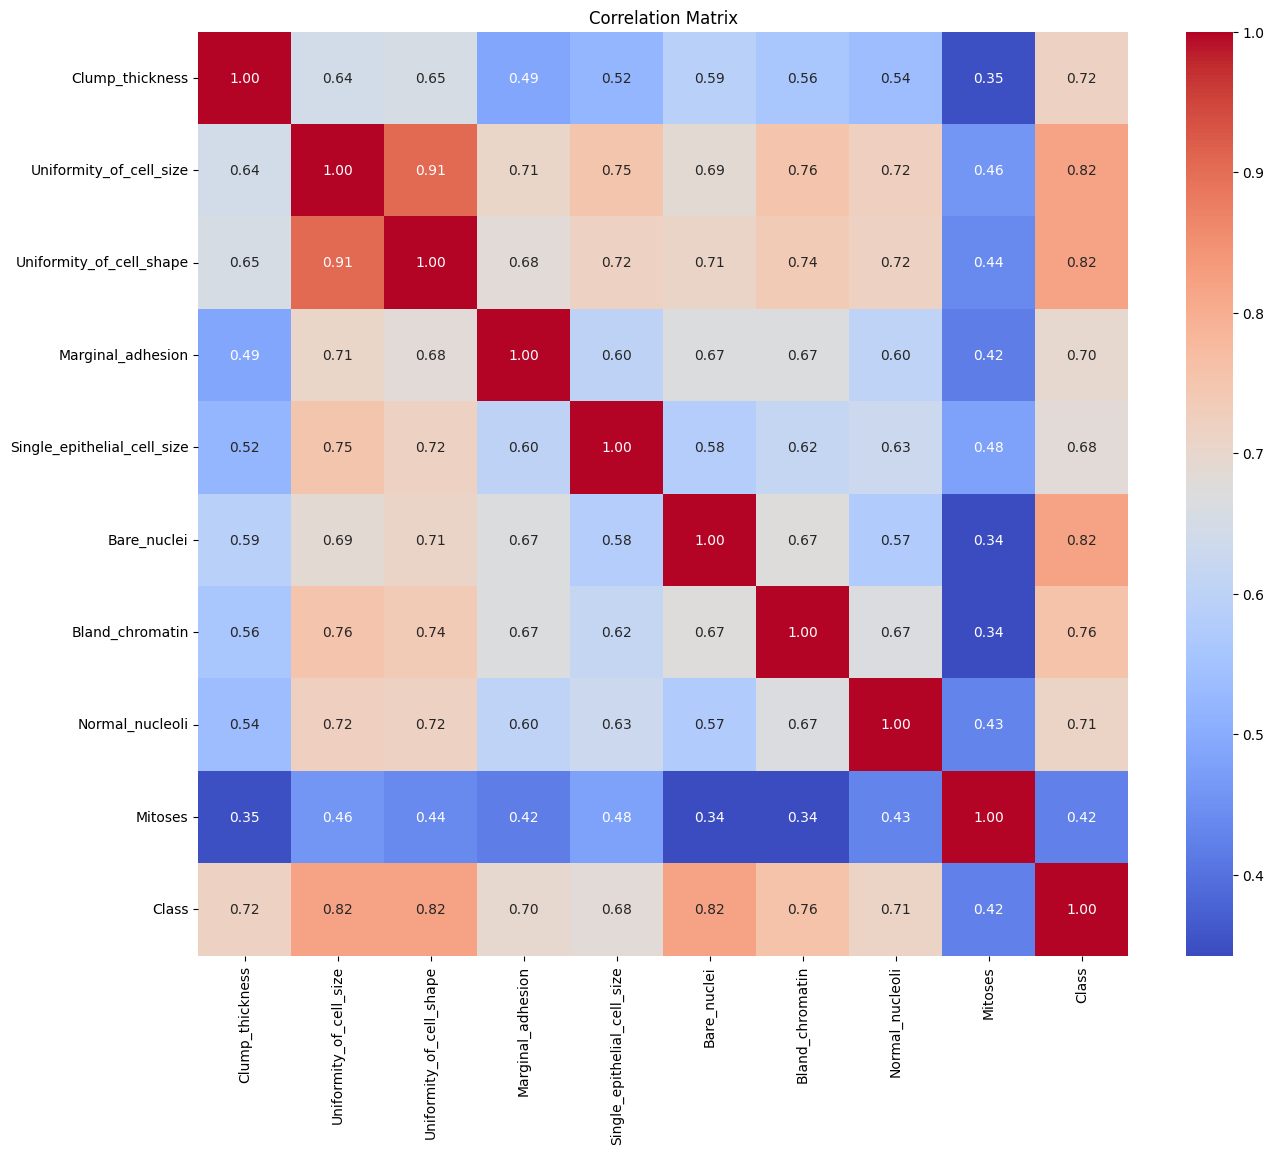

In [ ]:
# Plot Correlation Matrix
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot = True , fmt = '.2f', cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show

In [ ]:
# Pilih fitur dengan tingkat korelasi yang tinggi dengan fitur target: kolom 'Class'
correlated_features = corr_matrix['Class'].abs().sort_values(ascending=False)
print("Features sorted by correlation with the target:\n", correlated_features)

Features sorted by correlation with the target:
 Class                          1.000000
Bare_nuclei                    0.818968
Uniformity_of_cell_shape       0.818934
Uniformity_of_cell_size        0.817904
Bland_chromatin                0.756616
Clump_thickness                0.716001
Normal_nucleoli                0.712244
Marginal_adhesion              0.696800
Single_epithelial_cell_size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64


In [ ]:
# Simpan fitur dengan tingkat korelasi yang di atas 0.75
selected_features = correlated_features[correlated_features > 0.75].index.drop('Class')
x = x[selected_features]
print(selected_features)

NameError: name 'correlated_features' is not defined

In [ ]:
# Pisahkan data menjadi training dan test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standarisasi fitur, menyamakan range nilai
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Train Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Ranking Feature Importance dari Random Forest
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = x.columns

print("Feature ranking:")
for f in range(x.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. Feature Uniformity_of_cell_shape (0.2486227416824099)
2. Feature Uniformity_of_cell_size (0.22608523895356972)
3. Feature Bare_nuclei (0.17066986901582087)
4. Feature Bland_chromatin (0.09412159418985175)
5. Feature Normal_nucleoli (0.08935012123827274)
6. Feature Clump_thickness (0.06958037832701754)
7. Feature Single_epithelial_cell_size (0.06838137167959449)
8. Feature Marginal_adhesion (0.03318868491346309)


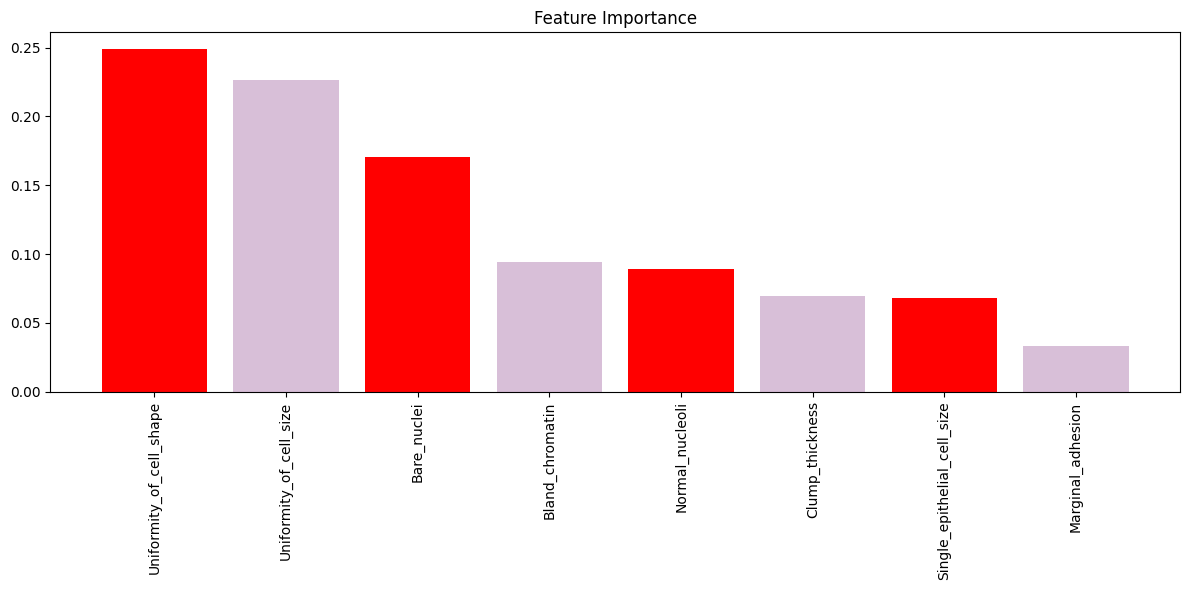

In [ ]:
# Plot feature importance
colors = ['red', 'thistle']
plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(x.shape[1]), importances[indices], align='center', color = colors)
plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Jalankan prediksi dari test dataset
y_pred = model.predict(x_test)

In [ ]:
# Evaluate Model Random Forest

# Skala untuk setiap kelas:
# Prediction: Rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. High Prediction -> Less false positive errors
# Recall: Rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. High Recall -> Less false negative errors
# F1-Score: Perbandingan rata-rata Precision dan Recall. High F1 -> Good balance of Precision and Recall
# Support:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:\n", class_report)

Accuracy: 97.14%
Confusion Matrix:
 [[94  1]
 [ 3 42]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        95
   Malignant       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



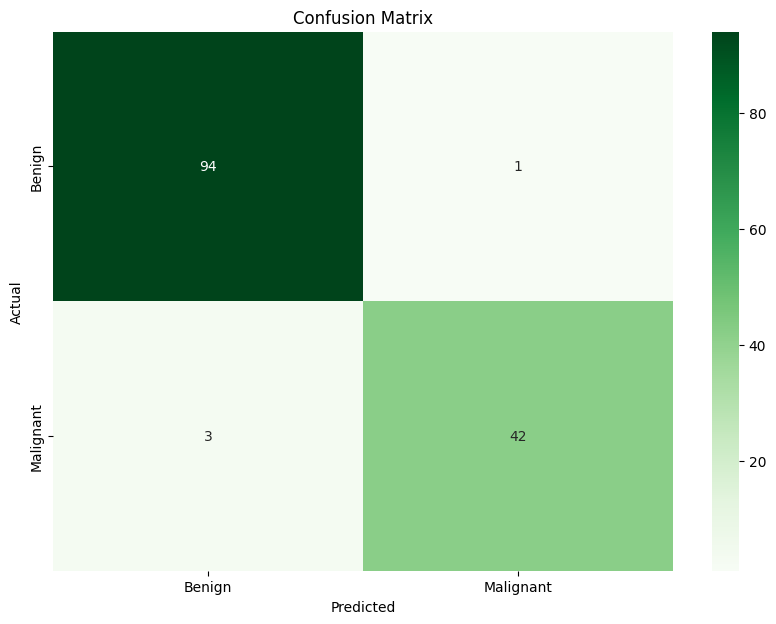

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()